<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# K-Nearest Neighbors

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Use K Nearest neighbors to classify data


In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?


**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="https://#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>


In [4]:
#!pip install scikit-learn==0.23.1

Let's load required libraries


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.core.defchararray import title
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imaginons qu'un fournisseur de services de télécommunications ait segmenté sa clientèle en fonction des habitudes d'utilisation de ses services, en classant les clients en quatre groupes. Si les données démographiques peuvent être utilisées pour prédire l'appartenance à un groupe, l'entreprise peut personnaliser les offres pour les clients potentiels individuels. Il s'agit d'un problème de classification. En d'autres termes, étant donné l'ensemble de données avec des étiquettes prédéfinies, nous devons construire un modèle à utiliser pour prédire la classe d'un nouveau cas ou d'un cas inconnu.

L'exemple se concentre sur l'utilisation de données démographiques, telles que la région, l'âge et l'état civil, pour prédire les habitudes d'utilisation.

Le champ cible, appelé **custcat**, a quatre valeurs possibles qui correspondent aux quatre groupes de clients, comme suit :

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Notre objectif est de construire un classificateur permettant de prédire la classe des cas inconnus. Nous utiliserons un type spécifique de classification appelé « K Nearest Neighbors

In [9]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"

df = pd.read_csv(path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set


In [10]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

#### Les Clients de ce dataset sont repartis comme suit:
* 281 Plus Service
* 266 Basic-service
* 236 Total Service
* 217 E-Service


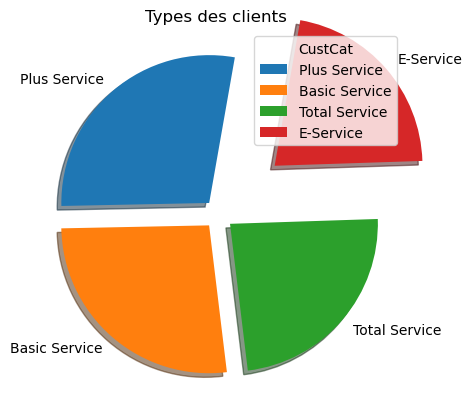

In [39]:
# df.custcat.hist()

labels = ['Plus Service', 'Basic Service', 'Total Service', 'E-Service']
decalage = [0.1, 0.1, 0.1, 0.5]
plt.pie(df.custcat.value_counts(), labels=labels, explode=decalage, shadow=True, startangle=80)
plt.legend(title='CustCat')
plt.title('Types des clients ')
plt.show()

### Feature set


Let's define feature sets, X:


In [40]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [46]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?


In [50]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalisation des donnees

La normalisation des données donne aux données une moyenne nulle et une variance unitaire. C'est une bonne pratique, en particulier pour les algorithmes tels que KNN, qui est basé sur la distance entre les points de données :

In [60]:
X = preprocessing.StandardScaler().fit_transform(X.astype(float))
# np.min(X)
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

La précision hors échantillon est le pourcentage de prédictions correctes que le modèle fait sur des données sur lesquelles il n'a PAS été entraîné. L'exécution d'un entraînement et d'un test sur le même ensemble de données aura très probablement une faible précision hors échantillon, en raison de la probabilité d'un surajustement de notre modèle.

Il est important que nos modèles aient une précision élevée hors échantillon, car l'objectif de tout modèle est bien sûr de faire des prédictions correctes sur des données inconnues. Comment améliorer la précision hors échantillon ? L'une des solutions consiste à utiliser une approche d'évaluation appelée « Train/Test Split ».
Cette approche consiste à diviser l'ensemble de données en deux ensembles, l'un d'entraînement et l'autre de test, qui s'excluent mutuellement. Ensuite, vous vous entraînez avec l'ensemble d'entraînement et vous testez avec l'ensemble de test.

Cette méthode permet d'obtenir une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour former le modèle. Cette méthode est plus réaliste pour les problèmes du monde réel.


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


Classifier implementing the k-nearest neighbors vote.


In [62]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:


In [64]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [65]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

### Accuracy evaluation

Dans la classification multi-labels, **le score  de classification de la précision** est une fonction qui calcule la précision des sous-ensembles. Cette fonction est égale à la fonction jaccard_score. Elle calcule essentiellement le degré de correspondance entre les étiquettes réelles et les étiquettes prédites dans l'ensemble de test.


In [66]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## Practice

Can you build the model again, but this time with k=6?


In [67]:
# write your code here
neighbors = 6
model = KNeighborsClassifier(n_neighbors=neighbors)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


<details><summary>Click here for the solution</summary>

```python
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

```

</details>


#### Qu'en est-il des autres K ?

K dans KNN est le nombre de voisins les plus proches à examiner. Il est censé être spécifié par l'utilisateur. Alors, comment choisir la bonne valeur pour K ?
La solution générale consiste à réserver une partie de vos données pour tester la précision du modèle. Choisissez alors k =1, utilisez la partie d'entraînement pour la modélisation et calculez la précision de la prédiction en utilisant tous les échantillons de votre ensemble de test. Répétez ce processus, en augmentant k, et voyez quel k est le meilleur pour votre modèle.

Nous pouvons calculer la précision du KNN pour différentes valeurs de k.


In [68]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### Plot the model accuracy for a different number of neighbors.


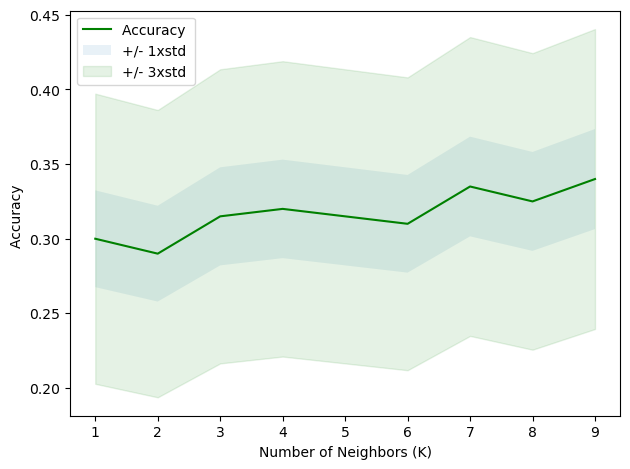

In [69]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [70]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>
